<a href="https://colab.research.google.com/github/DengBoCong/DeepLearning-Self/blob/master/TensorFlow-Tutorials/%E4%BD%BF%E7%94%A8RNN%E8%BF%9B%E8%A1%8C%E6%96%87%E6%9C%AC%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
391/391 [==============================] - 44s 112ms/step - loss: 0.6593 - accuracy: 0.5351 - val_loss: 0.5261 - val_accuracy: 0.7729
Epoch 2/10
391/391 [==============================] - 44s 112ms/step - loss: 0.5322 - accuracy: 0.7079 - val_loss: 0.4374 - val_accuracy: 0.8057
Epoch 3/10
391/391 [==============================] - 44s 113ms/step - loss: 0.3287 - accuracy: 0.8706 - val_loss: 0.3667 - val_accuracy: 0.8234
Epoch 4/10
391/391 [==============================] - 44s 113ms/step - loss: 0.2544 - accuracy: 0.9019 - val_loss: 0.3321 - val_accuracy: 0.8630
Epoch 5/10
391/391 [==============================] - 44s 113ms/step - loss: 0.2156 - accuracy: 0.9194 - val_loss: 0.3288 - val_accuracy: 0.8708
Epoch 6/10
391/391 [==============================] - 44s 112ms/step - loss: 0.1888 - accuracy: 0.9311 - val_loss: 0.3335 - val_accuracy: 0.8656
Epoch 7/10
391/391 [==============================] - 44s 114ms/step - loss: 0.1903 - accuracy: 0.9277 - val_loss: 0.3477 - val_ac

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 'accuracy' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()


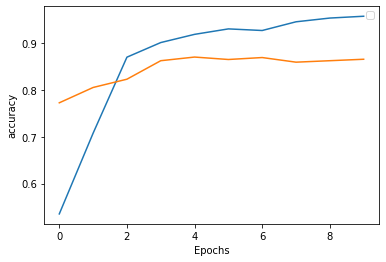

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 'loss' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()


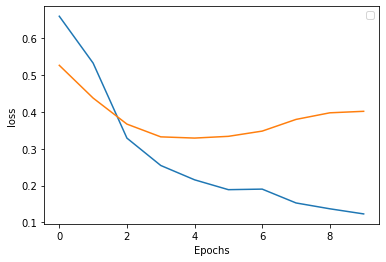

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric], 'val_'+metric)
  plt.show()

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

encoder = info.features['text'].encoder
# print('Vocabulary size: {}'.format(encoder.vocab_size))
# print(info)

# sample_string = 'Hello TensorFlow.'
# encoded_string = encoder.encode(sample_string)
# print('Encoded string is{}'.format(encoded_string))

# original_string = encoder.decode(encoded_string)
# print('The original string: "{}"'.format(original_string))

# assert original_string == sample_string

# for index in encoded_string:
#   print('{} ----> {}'.format(index, encoder.decode([index])))

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

model = tf.keras.Sequential([
  layers.Embedding(encoder.vocab_size, 64),
  layers.Bidirectional(layers.LSTM(64)),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          optimizer=tf.keras.optimizers.Adam(1e-4),
          metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
            validation_data=test_dataset, 
            validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
